In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Data = pd.read_csv("./Zomato data .csv")
Data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Data Cleaning;



To check null Value:

In [14]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB
None


In [15]:
np.sum(Data.isnull())

C:\Users\Satyajeet Pandey\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Converting the data type of column "rating".

In [16]:
def rate_transform(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

Data["rate"]=Data["rate"].apply(rate_transform)
Data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


To check customer's major order on the basis of restaurent type:

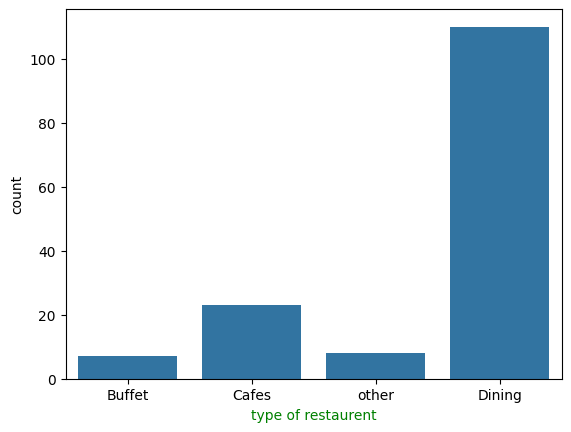

In [17]:
sns.countplot(x= Data["listed_in(type)"])
plt.xlabel("type of restaurent",c="green")
plt.show()

Rating:

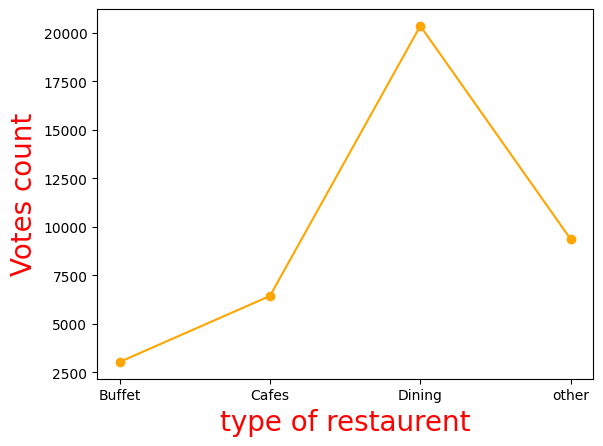

In [19]:
Grouped_data = Data.groupby(Data['listed_in(type)'])["votes"].sum()
result = pd.DataFrame({"votes":Grouped_data})
plt.plot(result, c='orange', marker='o')
plt.xlabel("type of restaurent",c='red',size=20)
plt.ylabel("Votes count",c='red',size=20)
plt.show()

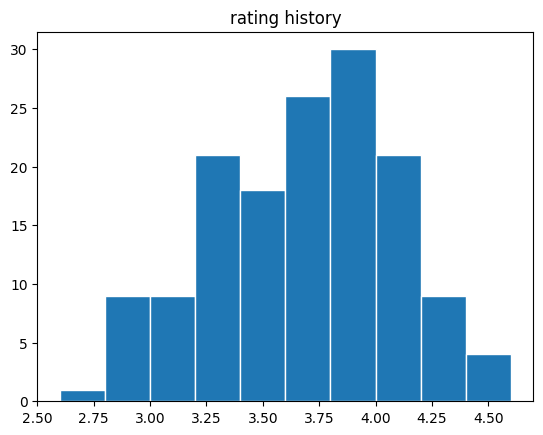

In [20]:
import matplotlib.pyplot as plt
plt.hist(Data['rate'],bins=10,edgecolor='w')
plt.title('rating history')
plt.show()

To find Approx spending on couple

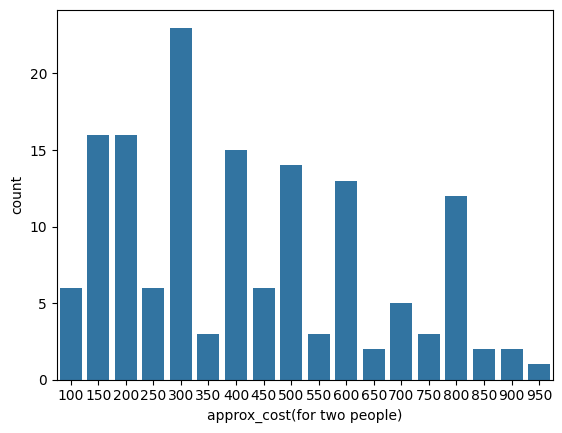

In [21]:
Couple_spending=Data["approx_cost(for two people)"]
sns.countplot(x=Couple_spending)
plt.show()

To Find the rating is online or offline mode.

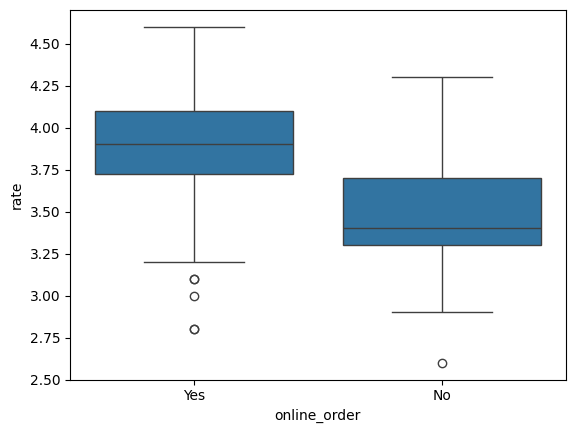

In [23]:
plt.figure(figure=(6,6))
sns.boxplot(x='online_order',y='rate',data=Data)
plt.show()

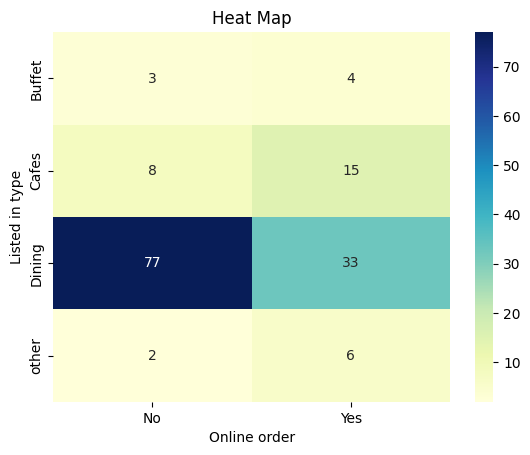

In [25]:
pivot_table=Data.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('Heat Map')
plt.xlabel("Online order")
plt.ylabel('Listed in type')
plt.show()

In [26]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB
